In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
student_df = pd.read_csv(r"data.csv", sep=";") # load dataset

In [557]:
student_df.head() # Print first 5 rows

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Checking for missing and duplicated values

In [558]:
print(student_df.isna()) # If true then theres a missing value

      Marital status  Application mode  Application order  Course  \
0              False             False              False   False   
1              False             False              False   False   
2              False             False              False   False   
3              False             False              False   False   
4              False             False              False   False   
...              ...               ...                ...     ...   
4419           False             False              False   False   
4420           False             False              False   False   
4421           False             False              False   False   
4422           False             False              False   False   
4423           False             False              False   False   

      Daytime/evening attendance\t  Previous qualification  \
0                            False                   False   
1                            False             

In [559]:
print(student_df.isna().sum()) # Get total number of missing values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [560]:
# Checking for duplicate rows
student_df.duplicated()[student_df.duplicated()==True]

Series([], dtype: bool)

# Dataset info

In [561]:
print(f"Dataset Shape (Row, Column):  {student_df.shape}") # Print dataset shape (row, column)

Dataset Shape (Row, Column):  (4424, 37)


In [562]:
student_df.dtypes # Print data types of the columns (before mappings)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

# Mappings

In [563]:
# Mappings 
nominal_features = [
    'Marital status', 'Application mode', 'Course', 
    'Nacionality', "Mother's occupation", "Father's occupation"
]

binary_features = [
    'Displaced', 'Educational special needs', 'Debtor', 
    'Tuition fees up to date', 'Scholarship holder', 'International'
]

ordinal_features = [
    'Application order', 'Previous qualification', 
    "Mother's qualification", "Father's qualification"
]

continuous_features = [
    'Previous qualification (grade)', 'Admission grade', 
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP', 'Age at enrollment'
]

# Remove any potential whitespaces to avoid issues
student_df.columns = student_df.columns.str.strip()

# Map data to categories used by dataset
mappings = {
    'Marital status': {
        1: 'single', 2: 'married', 3: 'widower', 
        4: 'divorced', 5: 'facto union', 6: 'legally separated'
    },
    'Application mode': {
        1: '1st phase - general contingent',
        2: 'Ordinance No. 612/93',
        5: '1st phase - special contingent (Azores Island)',
        7: 'Holders of other higher courses',
        10: 'Ordinance No. 854-B/99',
        15: 'International student (bachelor)',
        16: '1st phase - special contingent (Madeira Island)',
        17: '2nd phase - general contingent',
        18: '3rd phase - general contingent',
        26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
        27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
        39: 'Over 23 years old',
        42: 'Transfer',
        43: 'Change of course',
        44: 'Technological specialization diploma holders',
        51: 'Change of institution/course',
        53: 'Short cycle diploma holders',
        57: 'Change of institution/course (International)'
    },
    'Course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    'Daytime/evening attendance': {1: 'daytime', 0: 'evening'},
    'Previous qualification': {
        1: 'Secondary education',
        2: "Higher education - bachelor's degree",
        3: 'Higher education - degree',
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: 'Frequency of higher education',
        9: '12th year of schooling - not completed',
        10: '11th year of schooling - not completed',
        12: 'Other - 11th year of schooling',
        14: '10th year of schooling',
        15: '10th year of schooling - not completed',
        19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
        38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        42: 'Professional higher technical course',
        43: 'Higher education - master (2nd cycle)'
    },
    'Nacionality': {
        1: 'Portuguese',
        2: 'German',
        6: 'Spanish',
        11: 'Italian',
        13: 'Dutch',
        14: 'English',
        17: 'Lithuanian',
        21: 'Angolan',
        22: 'Cape Verdean',
        24: 'Guinean',
        25: 'Mozambican',
        26: 'Santomean',
        32: 'Turkish',
        41: 'Brazilian',
        62: 'Romanian',
        100: 'Moldova (Republic of)',
        101: 'Mexican',
        103: 'Ukrainian',
        105: 'Russian',
        108: 'Cuban',
        109: 'Colombian'
    },
    "Mother's qualification": {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: "Higher Education - Bachelor's Degree",
        3: 'Higher Education - Degree',
        4: "Higher Education - Master's",
        5: "Higher Education - Doctorate",
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        22: 'Technical-professional course',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        34: 'Unknown',
        35: "Can't read or write",
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    "Father's qualification": {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: "Higher Education - Bachelor's Degree",
        3: 'Higher Education - Degree',
        4: "Higher Education - Master's",
        5: "Higher Education - Doctorate",
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd year complementary high school course',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20: 'Complementary High School Course',
        22: 'Technical-professional course',
        25: 'Complementary High School Course - not concluded',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: "Can't read or write",
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    "Mother's occupation": {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        122: 'Health professionals',
        123: 'teachers',
        125: 'Specialists in information and communication technologies (ICT)',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Technicians and professionals, of intermediate level of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'personal service workers',
        152: 'sellers',
        153: 'Personal care workers and the like',
        171: 'Skilled construction workers and the like, except electricians',
        173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        191: 'cleaning workers',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants'
    },
    "Father's occupation": {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces personnel',
        112: 'Directors of administrative and commercial services',
        114: 'Hotel, catering, trade and other services directors',
        121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
        122: 'Health professionals',
        123: 'teachers',
        124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Technicians and professionals, of intermediate level of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        135: 'Information and communication technology technicians',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'personal service workers',
        152: 'sellers',
        153: 'Personal care workers and the like',
        154: 'Protection and security services personnel',
        161: 'Market-oriented farmers and skilled agricultural and animal production workers',
        163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
        171: 'Skilled construction workers and the like, except electricians',
        172: 'Skilled workers in metallurgy, metalworking and similar',
        174: 'Skilled workers in electricity and electronics',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        181: 'Fixed plant and machine operators',
        182: 'assembly workers',
        183: 'Vehicle drivers and mobile equipment operators',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants',
        195: 'Street vendors (except food) and street service providers'
    },
    'Gender': {1: 'Male', 0: 'Female'}
}

binary_map = {1: 'Yes', 0: 'No'}
binary_cols = ['Displaced', 'Educational special needs', 'Debtor', 
               'Tuition fees up to date', 'Scholarship holder', 'International']

# Apply the mappings
for col, col_map in mappings.items():
    if col in student_df.columns:
        student_df[col] = student_df[col].map(col_map)

for col in binary_cols:
    if col in student_df.columns:
        student_df[col] = student_df[col].map(binary_map)

# Convert to the correct types
for col in nominal_features:
    if col in student_df.columns:
        student_df[col] = student_df[col].astype('category')

for col in binary_cols:
    if col in student_df.columns:
        student_df[col] = student_df[col].astype('category')

for col in ordinal_features:
    if col in student_df.columns:
        student_df[col] = student_df[col].astype('category')

for col in continuous_features:
    if col in student_df.columns:
        student_df[col] = pd.to_numeric(student_df[col], errors='coerce').astype(float)

student_df['Target'] = student_df['Target'].astype('category')

# Check that everything worked 
student_df.dtypes

Marital status                                    category
Application mode                                  category
Application order                                 category
Course                                            category
Daytime/evening attendance                          object
Previous qualification                            category
Previous qualification (grade)                     float64
Nacionality                                       category
Mother's qualification                            category
Father's qualification                            category
Mother's occupation                               category
Father's occupation                               category
Admission grade                                    float64
Displaced                                         category
Educational special needs                         category
Debtor                                            category
Tuition fees up to date                           catego

In [564]:
student_df.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424,4424,4424.0,4424,4424,4424,4424.000000,4424,4424,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6,18,8.0,17,2,17,NaN,21,29,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,single,1st phase - general contingent,1.0,Nursing,daytime,Secondary education,NaN,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic education 1st cycle (4th/5th year) or eq...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,1708,3026.0,766,3941,3717,NaN,4314,1069,1209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,NaN,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


# Univariate Analysis

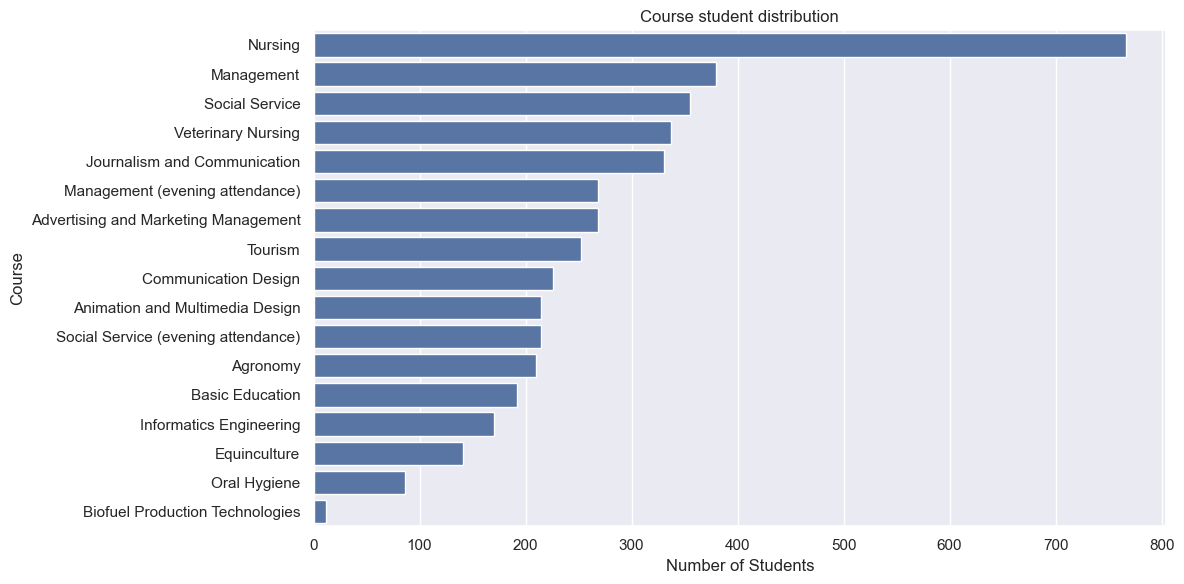

In [565]:
# Course student distribution
plt.figure(figsize=(12,6))
sns.countplot(data=student_df, y='Course', order=student_df['Course'].value_counts().index)
plt.title('Course student distribution')
plt.xlabel('Number of Students')
plt.ylabel('Course')
plt.tight_layout()
plt.show()

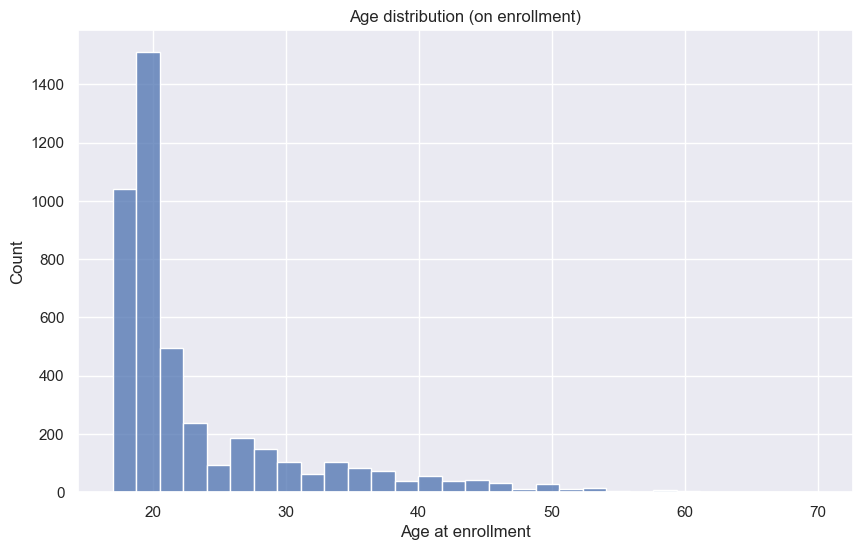

In [566]:
# Plot for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=student_df, x='Age at enrollment', bins=30)
plt.title("Age distribution (on enrollment)")
plt.show()

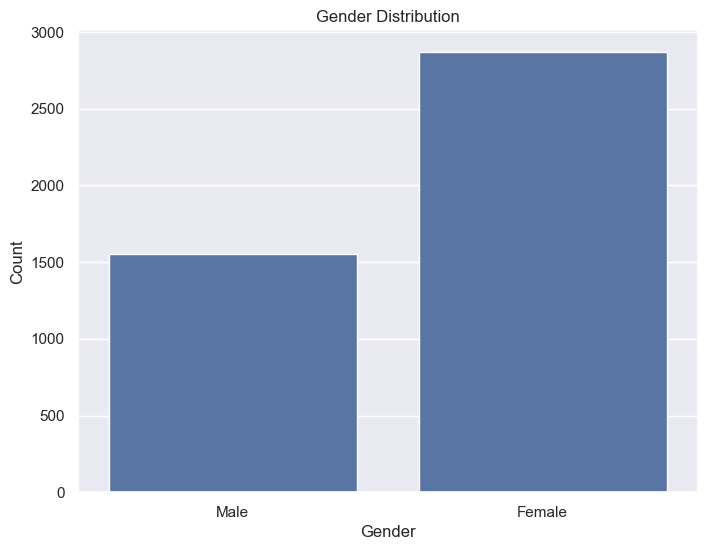

In [567]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=student_df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

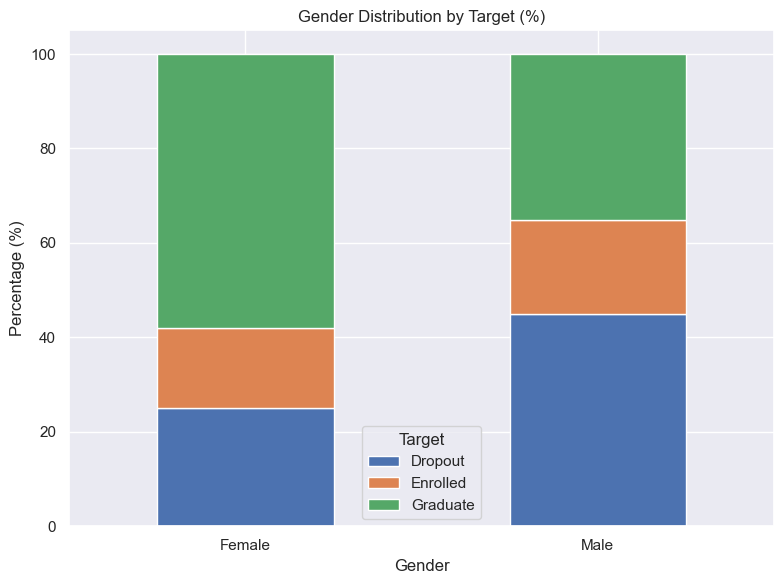

In [568]:
# Gender Distribution by Target (%)
gender_target = pd.crosstab(student_df['Gender'], student_df['Target'], normalize='index') * 100
gender_target.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Gender Distribution by Target (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

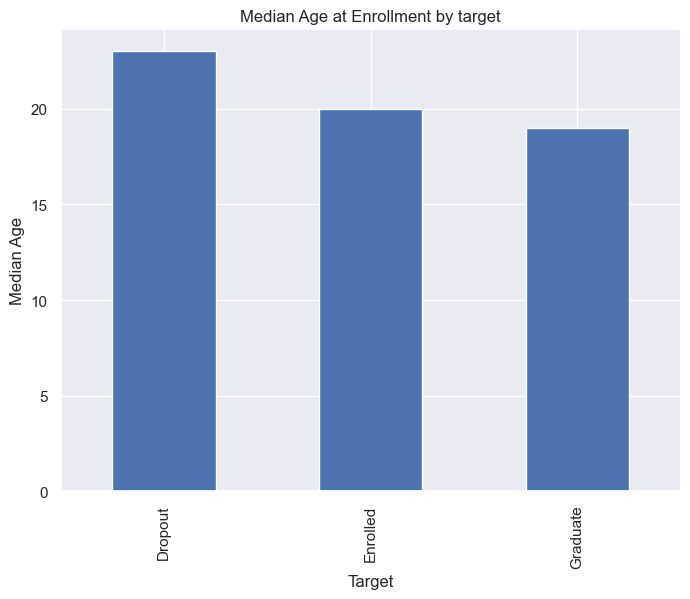

In [ ]:
# Median Age at enrollment by targer
plt.figure(figsize=(8, 6))
student_df.groupby('Target', observed=True)['Age at enrollment'].median().plot(kind='bar')
plt.title('Median Age at Enrollment by target')
plt.ylabel('Median Age')
plt.xlabel('Target')
plt.xticks(rotation=0)
plt.show()

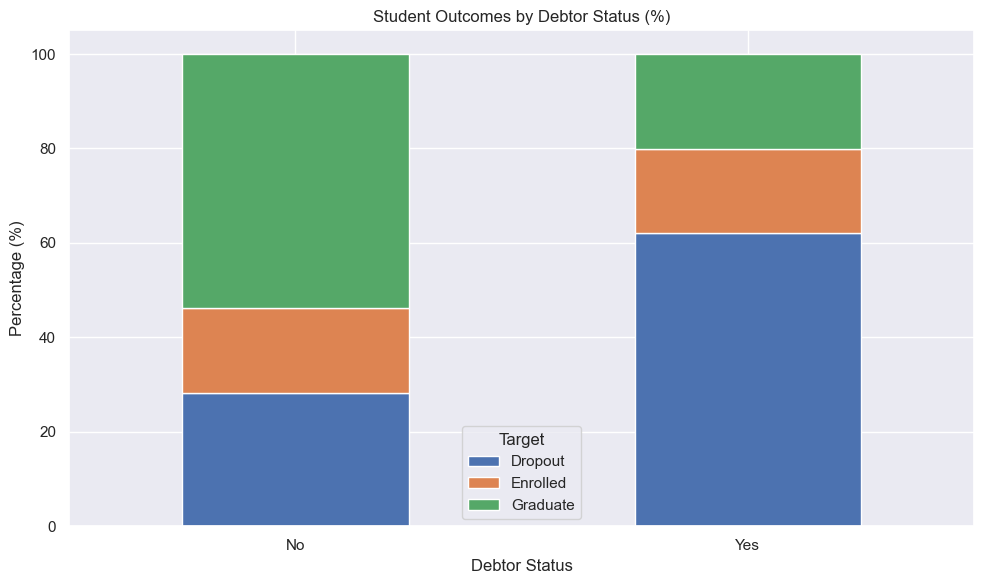

In [570]:
# Debtor Status Impact on Target Outcomes (%)
debtor_target = pd.crosstab(student_df['Debtor'], student_df['Target'], normalize='index') * 100
debtor_target.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Student Outcomes by Debtor Status (%)')
plt.xlabel('Debtor Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

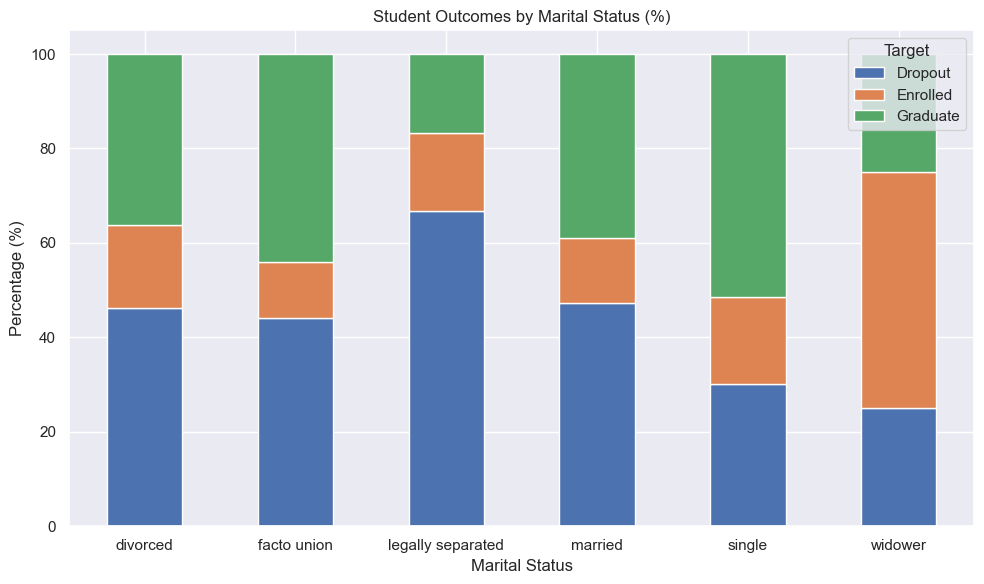

In [571]:
# Marital Status vs Target Outcomes (%)
marital_target = pd.crosstab(student_df['Marital status'], student_df['Target'], normalize='index') * 100
marital_target.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Student Outcomes by Marital Status (%)')
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

# Correlations Matrix

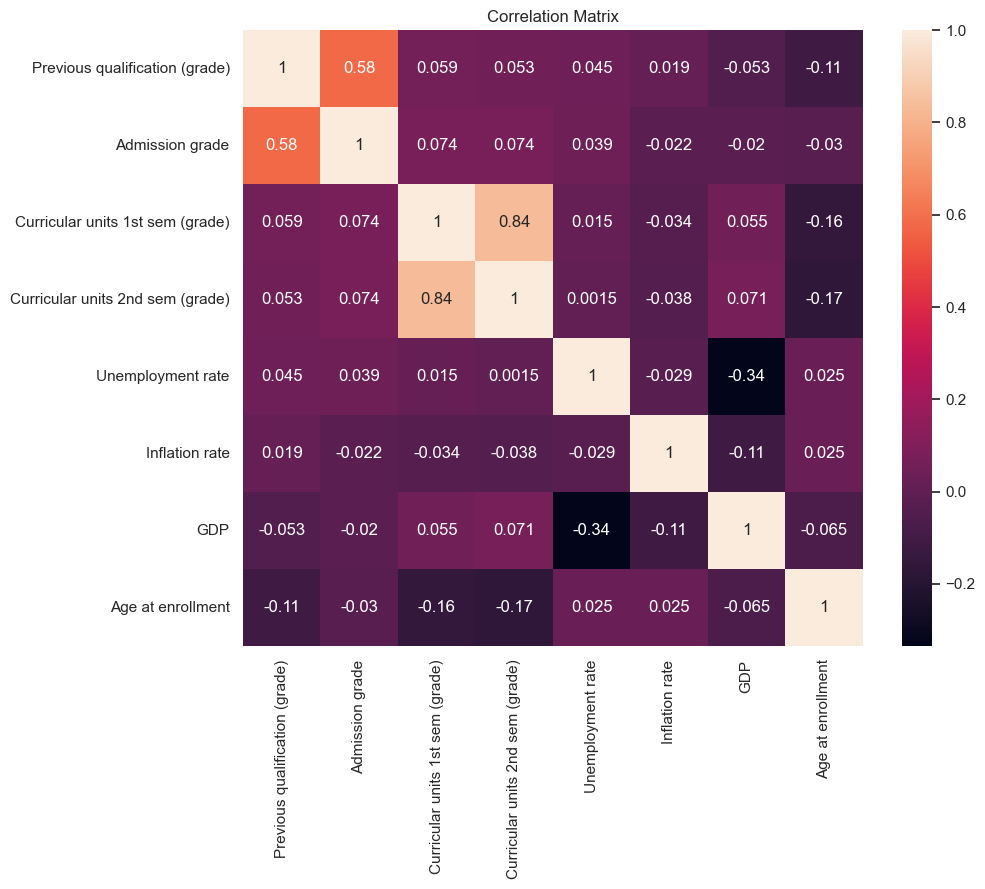

In [572]:
corr_matrix = student_df[continuous_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()